<a href="https://www.kaggle.com/code/aishahkanwal/odi-batting-data-processing-eda?scriptVersionId=117020913" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icc-cricket/Batting/t20.csv
/kaggle/input/icc-cricket/Batting/ODI data.csv
/kaggle/input/icc-cricket/Batting/test.csv
/kaggle/input/icc-cricket/Fielding/Fielding_t20.csv
/kaggle/input/icc-cricket/Fielding/Fielding_ODI.csv
/kaggle/input/icc-cricket/Fielding/Fielding_test.csv
/kaggle/input/icc-cricket/Bowling/Bowling_t20.csv
/kaggle/input/icc-cricket/Bowling/Bowling_ODI.csv
/kaggle/input/icc-cricket/Bowling/Bowling_test.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
odi = pd.read_csv('/kaggle/input/icc-cricket/Batting/ODI data.csv')

# Exploratory Data Analysis

In [4]:
#Number of rows and Cols
odi.shape

(2500, 15)

In [5]:
odi.head(20)

Unnamed: 0                       Player       Span  Mat Inns  NO   Runs  \
0            0         SR Tendulkar (INDIA)  1989-2012  463  452  41  18426   
1            1  KC Sangakkara (Asia/ICC/SL)  2000-2015  404  380  41  14234   
2            2         RT Ponting (AUS/ICC)  1995-2012  375  365  39  13704   
3            3      ST Jayasuriya (Asia/SL)  1989-2011  445  433  18  13430   
4            4   DPMD Jayawardene (Asia/SL)  1998-2015  448  418  39  12650   
5            5    Inzamam-ul-Haq (Asia/PAK)  1991-2007  378  350  53  11739   
6            6              V Kohli (INDIA)  2008-2019  242  233  39  11609   
7            7       JH Kallis (Afr/ICC/SA)  1996-2014  328  314  53  11579   
8            8      SC Ganguly (Asia/INDIA)  1992-2007  311  300  23  11363   
9            9    R Dravid (Asia/ICC/INDIA)  1996-2011  344  318  40  10889   
10          10        MS Dhoni (Asia/INDIA)  2004-2019  350  297  84  10773   
11          11            CH Gayle (ICC/WI)  1999-2019  301  294  17  10480   
12          12             BC Lara (ICC/WI)  1990-2007  299  289  32  10405   
13          13              TM Dilshan (SL)  1999-2016  330  303  41  10290   
14          14   Mohammad Yousuf (Asia/PAK)  1998-2010  288  273  40   9720   
15          15       AC Gilchrist (AUS/ICC)  1996-2008  287  279  11   9619   
16          16      AB de Villiers (Afr/SA)  2005-2018  228  218  39   9577   
17          17         M Azharuddin (INDIA)  1985-2000  334  308  54   9378   
18          18             PA de Silva (SL)  1984-2003  308  296  30   9284   
19          19            RG Sharma (INDIA)  2007-2019  221  214  32   8944   

      HS    Ave     BF      SR 100  50   0  Unnamed: 13  
0   200*  44.83  21367   86.23  49  96  20          NaN  
1    169  41.98  18048   78.86  25  93  15          NaN  
2    164  42.03  17046   80.39  30  82  20          NaN  
3    189  32.36  14725    91.2  28  68  34          NaN  
4    144  33.37  16020   78.96  19  77  28          NaN  
5   137*  39.52  15812   74.24  10  83  20          NaN  
6    183  59.84  12445   93.28  43  55  13          NaN  
7    139  44.36  15885   72.89  17  86  17          NaN  
8    183  41.02  15416    73.7  22  72  16          NaN  
9    153  39.16  15284   71.24  12  83  13          NaN  
10  183*  50.57  12303   87.56  10  73  10          NaN  
11   215  37.83  12019   87.19  25  54  25          NaN  
12   169  40.48  13086   79.51  19  63  16          NaN  
13  161*  39.27  11933   86.23  22  47  11          NaN  
14  141*  41.71  12942    75.1  15  64  15          NaN  
15   172  35.89   9922   96.94  16  55  19          NaN  
16   176   53.5   9473  101.09  25  53   7          NaN  
17  153*  36.92  12669   74.02   7  58   9          NaN  
18   145   34.9  11443   81.13  11  64  17          NaN  
19   264  49.14  10063   88.88  28  43  13          NaN

In [6]:
#data types check
odi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2500 non-null   int64  
 1   Player       2500 non-null   object 
 2   Span         2500 non-null   object 
 3   Mat          2500 non-null   int64  
 4   Inns         2500 non-null   object 
 5   NO           2500 non-null   object 
 6   Runs         2500 non-null   object 
 7   HS           2500 non-null   object 
 8   Ave          2500 non-null   object 
 9   BF           2500 non-null   object 
 10  SR           2500 non-null   object 
 11  100          2500 non-null   object 
 12  50           2500 non-null   object 
 13  0            2500 non-null   object 
 14  Unnamed: 13  0 non-null      float64
dtypes: float64(1), int64(2), object(12)
memory usage: 293.1+ KB


In [7]:
#summary check
odi.describe()

Unnamed: 0          Mat  Unnamed: 13
count  2500.000000  2500.000000          0.0
mean     24.500000    37.161600          NaN
std      14.433757    58.885075          NaN
min       0.000000     1.000000          NaN
25%      12.000000     4.000000          NaN
50%      24.500000    13.000000          NaN
75%      37.000000    43.000000          NaN
max      49.000000   463.000000          NaN

In [8]:
#check for null values
odi.columns[odi.isnull().any()], odi.isnull().sum()

(Index(['Unnamed: 13'], dtype='object'),
 Unnamed: 0        0
 Player            0
 Span              0
 Mat               0
 Inns              0
 NO                0
 Runs              0
 HS                0
 Ave               0
 BF                0
 SR                0
 100               0
 50                0
 0                 0
 Unnamed: 13    2500
 dtype: int64)

In [9]:
#delete unnamed: 0 column
odi = odi.drop(['Unnamed: 0', 'Unnamed: 13'], axis=1)
odi.head()

Player       Span  Mat Inns  NO   Runs    HS    Ave  \
0         SR Tendulkar (INDIA)  1989-2012  463  452  41  18426  200*  44.83   
1  KC Sangakkara (Asia/ICC/SL)  2000-2015  404  380  41  14234   169  41.98   
2         RT Ponting (AUS/ICC)  1995-2012  375  365  39  13704   164  42.03   
3      ST Jayasuriya (Asia/SL)  1989-2011  445  433  18  13430   189  32.36   
4   DPMD Jayawardene (Asia/SL)  1998-2015  448  418  39  12650   144  33.37   

      BF     SR 100  50   0  
0  21367  86.23  49  96  20  
1  18048  78.86  25  93  15  
2  17046  80.39  30  82  20  
3  14725   91.2  28  68  34  
4  16020  78.96  19  77  28

In [10]:
#remove ( from column player and split into region column)
odi[['Player', 'Region']] = odi['Player'].str.split("(", n=1, expand=True)
odi.head()

Player       Span  Mat Inns  NO   Runs    HS    Ave     BF  \
0      SR Tendulkar   1989-2012  463  452  41  18426  200*  44.83  21367   
1     KC Sangakkara   2000-2015  404  380  41  14234   169  41.98  18048   
2        RT Ponting   1995-2012  375  365  39  13704   164  42.03  17046   
3     ST Jayasuriya   1989-2011  445  433  18  13430   189  32.36  14725   
4  DPMD Jayawardene   1998-2015  448  418  39  12650   144  33.37  16020   

      SR 100  50   0        Region  
0  86.23  49  96  20        INDIA)  
1  78.86  25  93  15  Asia/ICC/SL)  
2  80.39  30  82  20      AUS/ICC)  
3   91.2  28  68  34      Asia/SL)  
4  78.96  19  77  28      Asia/SL)

In [11]:
#removing ) from region column
odi['Region'] = odi['Region'].map(lambda x: x.rstrip(')'))
odi.head(2)

Player       Span  Mat Inns  NO   Runs    HS    Ave     BF     SR  \
0   SR Tendulkar   1989-2012  463  452  41  18426  200*  44.83  21367  86.23   
1  KC Sangakkara   2000-2015  404  380  41  14234   169  41.98  18048  78.86   

  100  50   0       Region  
0  49  96  20        INDIA  
1  25  93  15  Asia/ICC/SL

In [12]:
#split span column into start and end year
odi[['Start', 'End']] = odi['Span'].str.split("-", n=1, expand=True)
odi.head(2)

Player       Span  Mat Inns  NO   Runs    HS    Ave     BF     SR  \
0   SR Tendulkar   1989-2012  463  452  41  18426  200*  44.83  21367  86.23   
1  KC Sangakkara   2000-2015  404  380  41  14234   169  41.98  18048  78.86   

  100  50   0       Region Start   End  
0  49  96  20        INDIA  1989  2012  
1  25  93  15  Asia/ICC/SL  2000  2015

In [13]:
#split region column into region1 and region2
odi[['Region1', 'Region']] = odi['Region'].str.split("/", n=1, expand=True)
odi.head(2)

Player       Span  Mat Inns  NO   Runs    HS    Ave     BF     SR  \
0   SR Tendulkar   1989-2012  463  452  41  18426  200*  44.83  21367  86.23   
1  KC Sangakkara   2000-2015  404  380  41  14234   169  41.98  18048  78.86   

  100  50   0  Region Start   End Region1  
0  49  96  20    None  1989  2012   INDIA  
1  25  93  15  ICC/SL  2000  2015    Asia

In [14]:
#split region1 column into region2
odi[['Region2', 'Region']] = odi['Region'].str.split("/", n=1, expand=True)
odi.head(2)

Player       Span  Mat Inns  NO   Runs    HS    Ave     BF     SR  \
0   SR Tendulkar   1989-2012  463  452  41  18426  200*  44.83  21367  86.23   
1  KC Sangakkara   2000-2015  404  380  41  14234   169  41.98  18048  78.86   

  100  50   0 Region Start   End Region1 Region2  
0  49  96  20   None  1989  2012   INDIA    None  
1  25  93  15     SL  2000  2015    Asia     ICC

In [15]:
#unique values in region1 
print("Region1 unique values are: ", odi.Region1.unique()) 
print("Region2 unique values are: ", odi.Region2.unique())
print("Region unique values are: ", odi.Region.unique())

Region1 unique values are:  ['INDIA' 'Asia' 'AUS' 'Afr' 'ICC' 'SL' 'PAK' 'WI' 'NZ' 'SA' 'ENG' 'BDESH'
 'ZIM' 'IRE' 'AFG' 'SCOT' 'KENYA' 'CAN' 'NL' 'UAE' 'HKG' 'BMUDA' 'PNG'
 'USA' 'NAM' 'NEPAL' 'OMAN' '3) (PAK' 'EAf' '1) (UAE']
Region2 unique values are:  [None 'ICC' 'SL' 'PAK' 'INDIA' 'WI' 'SA' 'NZ' 'IRE' 'ZIM' 'BDESH' 'KENYA'
 'PNG' 'SCOT' 'USA']
Region unique values are:  [None 'SL' 'SA' 'INDIA' 'PAK']


In [16]:
def new_co(odi):
    if odi['Region1'] is not None:
        if odi['Region1'].isupper():
            if (odi.Region1=='ICC'):
                return odi['Region2']
            else:
                return odi['Region1']
                
        elif odi['Region'] is not None:
            if odi['Region'].isupper():
                if odi['Region'] is not "ICC":
                    return odi['Region']
            else:
                return odi['Region2']
        else:
                return odi['Region2']
    else:
        return "NA"

In [17]:
odi['Final Region'] = odi.apply(new_co, axis=1)
odi

Player       Span  Mat Inns  NO   Runs    HS    Ave     BF  \
0         SR Tendulkar   1989-2012  463  452  41  18426  200*  44.83  21367   
1        KC Sangakkara   2000-2015  404  380  41  14234   169  41.98  18048   
2           RT Ponting   1995-2012  375  365  39  13704   164  42.03  17046   
3        ST Jayasuriya   1989-2011  445  433  18  13430   189  32.36  14725   
4     DPMD Jayawardene   1998-2015  448  418  39  12650   144  33.37  16020   
...                 ...        ...  ...  ...  ..    ...   ...    ...    ...   
2495         ZS Ansari   2015-2015    1    -   -      -     -      -      -   
2496      Ariful Haque   2018-2018    1    -   -      -     -      -      -   
2497      Ashfaq Ahmed   1994-1994    3    -   -      -     -      -      -   
2498         MD Bailey   1998-1998    1    -   -      -     -      -      -   
2499          GR Beard   1981-1981    2    -   -      -     -      -      -   

         SR 100  50   0 Region Start   End Region1 Region2 Final Region  
0     86.23  49  96  20   None  1989  2012   INDIA    None        INDIA  
1     78.86  25  93  15     SL  2000  2015    Asia     ICC           SL  
2     80.39  30  82  20   None  1995  2012     AUS     ICC          AUS  
3      91.2  28  68  34   None  1989  2011    Asia      SL           SL  
4     78.96  19  77  28   None  1998  2015    Asia      SL           SL  
...     ...  ..  ..  ..    ...   ...   ...     ...     ...          ...  
2495      -   -   -   -   None  2015  2015     ENG    None          ENG  
2496      -   -   -   -   None  2018  2018   BDESH    None        BDESH  
2497      -   -   -   -   None  1994  1994     PAK    None          PAK  
2498      -   -   -   -   None  1998  1998      NZ    None           NZ  
2499      -   -   -   -   None  1981  1981     AUS    None          AUS  

[2500 rows x 19 columns]

In [18]:
odi["Final Region"].unique()

array(['INDIA', 'SL', 'AUS', 'PAK', 'SA', 'WI', 'NZ', 'ENG', 'BDESH',
       'ZIM', 'IRE', 'KENYA', 'AFG', 'SCOT', 'CAN', 'NL', 'UAE', 'HKG',
       'BMUDA', 'PNG', 'USA', 'NAM', 'NEPAL', 'OMAN', '3) (PAK', None,
       '1) (UAE'], dtype=object)

In [19]:
#check null values in final region
print(odi["Final Region"].isnull().sum())

13


In [20]:
#drop region1, region2, region columns
odi = odi.drop(["Region1", "Region2", "Region"], axis=1)
odi.head()

Player       Span  Mat Inns  NO   Runs    HS    Ave     BF  \
0      SR Tendulkar   1989-2012  463  452  41  18426  200*  44.83  21367   
1     KC Sangakkara   2000-2015  404  380  41  14234   169  41.98  18048   
2        RT Ponting   1995-2012  375  365  39  13704   164  42.03  17046   
3     ST Jayasuriya   1989-2011  445  433  18  13430   189  32.36  14725   
4  DPMD Jayawardene   1998-2015  448  418  39  12650   144  33.37  16020   

      SR 100  50   0 Start   End Final Region  
0  86.23  49  96  20  1989  2012        INDIA  
1  78.86  25  93  15  2000  2015           SL  
2  80.39  30  82  20  1995  2012          AUS  
3   91.2  28  68  34  1989  2011           SL  
4  78.96  19  77  28  1998  2015           SL

In [21]:
#check unique values in final region
odi["Final Region"].unique()

array(['INDIA', 'SL', 'AUS', 'PAK', 'SA', 'WI', 'NZ', 'ENG', 'BDESH',
       'ZIM', 'IRE', 'KENYA', 'AFG', 'SCOT', 'CAN', 'NL', 'UAE', 'HKG',
       'BMUDA', 'PNG', 'USA', 'NAM', 'NEPAL', 'OMAN', '3) (PAK', None,
       '1) (UAE'], dtype=object)

In [22]:
odi = odi.drop([2148, 949])
odi

Player       Span  Mat Inns  NO   Runs    HS    Ave     BF  \
0         SR Tendulkar   1989-2012  463  452  41  18426  200*  44.83  21367   
1        KC Sangakkara   2000-2015  404  380  41  14234   169  41.98  18048   
2           RT Ponting   1995-2012  375  365  39  13704   164  42.03  17046   
3        ST Jayasuriya   1989-2011  445  433  18  13430   189  32.36  14725   
4     DPMD Jayawardene   1998-2015  448  418  39  12650   144  33.37  16020   
...                 ...        ...  ...  ...  ..    ...   ...    ...    ...   
2495         ZS Ansari   2015-2015    1    -   -      -     -      -      -   
2496      Ariful Haque   2018-2018    1    -   -      -     -      -      -   
2497      Ashfaq Ahmed   1994-1994    3    -   -      -     -      -      -   
2498         MD Bailey   1998-1998    1    -   -      -     -      -      -   
2499          GR Beard   1981-1981    2    -   -      -     -      -      -   

         SR 100  50   0 Start   End Final Region  
0     86.23  49  96  20  1989  2012        INDIA  
1     78.86  25  93  15  2000  2015           SL  
2     80.39  30  82  20  1995  2012          AUS  
3      91.2  28  68  34  1989  2011           SL  
4     78.96  19  77  28  1998  2015           SL  
...     ...  ..  ..  ..   ...   ...          ...  
2495      -   -   -   -  2015  2015          ENG  
2496      -   -   -   -  2018  2018        BDESH  
2497      -   -   -   -  1994  1994          PAK  
2498      -   -   -   -  1998  1998           NZ  
2499      -   -   -   -  1981  1981          AUS  

[2498 rows x 16 columns]

In [23]:
odi["Final Region"].unique()

array(['INDIA', 'SL', 'AUS', 'PAK', 'SA', 'WI', 'NZ', 'ENG', 'BDESH',
       'ZIM', 'IRE', 'KENYA', 'AFG', 'SCOT', 'CAN', 'NL', 'UAE', 'HKG',
       'BMUDA', 'PNG', 'USA', 'NAM', 'NEPAL', 'OMAN', None], dtype=object)

In [24]:
#Rmoving data of East African Region 
odi=odi[odi['Final Region'].isnull()==False]

In [25]:
odi["Final Region"].unique()

array(['INDIA', 'SL', 'AUS', 'PAK', 'SA', 'WI', 'NZ', 'ENG', 'BDESH',
       'ZIM', 'IRE', 'KENYA', 'AFG', 'SCOT', 'CAN', 'NL', 'UAE', 'HKG',
       'BMUDA', 'PNG', 'USA', 'NAM', 'NEPAL', 'OMAN'], dtype=object)

In [26]:
#check null values in final region

odi[odi["Final Region"].isnull()]
odi.isna().sum()

Player          0
Span            0
Mat             0
Inns            0
NO              0
Runs            0
HS              0
Ave             0
BF              0
SR              0
100             0
50              0
0               0
Start           0
End             0
Final Region    0
dtype: int64

In [27]:
#removing * from HS column

odi["HS"] = odi["HS"].str.replace('*', '')
odi.tail(50)

Player       Span  Mat Inns NO Runs HS   Ave  BF    SR 100 50  \
2450       GJP Kruger   2006-2006    3    2  1    0  0  0.00  10  0.00   0  0   
2451       AGR Loudon   2006-2006    1    1  0    0  0  0.00   0     -   0  0   
2452         OC McCoy   2018-2018    2    1  1    0  0     -   1  0.00   0  0   
2453     AW Mathieson   2015-2015    1    1  1    0  0     -   0     -   0  0   
2454     KP Meiyappan   2019-2019    2    1  0    0  0  0.00   1  0.00   0  0   
2455       JP Millmow   1990-1990    5    1  1    0  0     -   3  0.00   0  0   
2456  Mohammad Khalil   2005-2005    3    1  1    0  0     -   0     -   0  0   
2457   Mohammad Talha   2014-2014    3    1  0    0  0  0.00   1  0.00   0  0   
2458       D Mohammed   2006-2008    7    1  1    0  0     -   2  0.00   0  0   
2459      Naeem Ahmed   1978-1978    1    1  1    0  0     -   8  0.00   0  0   
2460       Najaf Shah   2007-2007    1    1  0    0  0  0.00   2  0.00   0  0   
2461     Naseer Malik   1975-1975    3    1  1    0  0     -  13  0.00   0  0   
2462     Nasir Hameed   2004-2004    1    1  0    0  0  0.00   1  0.00   0  0   
2463         AM Nayar   2009-2009    3    1  1    0  0     -   7  0.00   0  0   
2464          N Ncube   2011-2011    1    1  1    0  0     -   0     -   0  0   
2465          A Neill   2019-2019    1    1  1    0  0     -   3  0.00   0  0   
2466         MB Owens   1992-1992    1    1  0    0  0  0.00   3  0.00   0  0   
2467        NM Parker   1976-1976    1    1  0    0  0  0.00   3  0.00   0  0   
2468        NT Pascal   2009-2009    1    1  0    0  0  0.00   1  0.00   0  0   
2469        N Phillip   1978-1978    1    1  0    0  0  0.00   5  0.00   0  0   
2470       AG Puttick   2005-2005    1    1  0    0  0  0.00   5  0.00   0  0   
2471       NV Radford   1988-1988    6    3  2    0  0  0.00   7  0.00   0  0   
2472    Rafiqul Islam   2002-2002    1    1  0    0  0  0.00   5  0.00   0  0   
2473      CAK Rajitha   2018-2019    9    3  2    0  0  0.00  10  0.00   0  0   
2474      DR Ramsammy   2012-2012    1    1  0    0  0  0.00   3  0.00   0  0   
2475      N Ranatunga   1993-1993    2    1  0    0  0  0.00   3  0.00   0  0   
2476       Raza Hasan   2014-2014    1    1  0    0  0  0.00   2  0.00   0  0   
2477     Rizwan Latif   2004-2004    1    1  0    0  0  0.00   2  0.00   0  0   
2478     Robiul Islam   2013-2013    3    1  1    0  0     -   1  0.00   0  0   
2479   Saqib Zulfiqar   2019-2019    1    1  0    0  0  0.00   4  0.00   0  0   
2480     Shadab Kabir   1996-1996    3    3  0    0  0  0.00   5  0.00   0  0   
2481     Shakeel Khan   1987-1987    1    1  0    0  0  0.00   4  0.00   0  0   
2482         T Shamsi   2016-2019   17    3  2    0  0  0.00   2  0.00   0  0   
2483  Simandeep Singh   2018-2018    1    1  0    0  0  0.00   7  0.00   0  0   
2484        GS Sobers   1973-1973    1    1  0    0  0  0.00   6  0.00   0  0   
2485     Tanvir Mehdi   1992-1992    1    1  0    0  0  0.00   5  0.00   0  0   
2486  M Venkataramana   1988-1988    1    1  1    0  0     -   0     -   0  0   
2487        R Walters   2003-2003    2    2  0    0  0  0.00   5  0.00   0  0   
2488    CM Willoughby   2000-2003    3    2  0    0  0  0.00   4  0.00   0  0   
2489    Zakir Hossain   1998-1998    1    1  0    0  0  0.00   1  0.00   0  0   
2490     Aamer Hameed   1977-1978    2    -  -    -  -     -   -     -   -  -   
2491       Abdur Rauf   2008-2008    4    -  -    -  -     -   -     -   -  -   
2492        Abu Jayed   2019-2019    2    -  -    -  -     -   -     -   -  -   
2493      FS Ahangama   1985-1985    1    -  -    -  -     -   -     -   -  -   
2494      GW Aldridge   2011-2011    2    -  -    -  -     -   -     -   -  -   
2495        ZS Ansari   2015-2015    1    -  -    -  -     -   -     -   -  -   
2496     Ariful Haque   2018-2018    1    -  -    -  -     -   -     -   -  -   
2497     Ashfaq Ahmed   1994-1994    3    -  -    -  -     -   -     -   -  -   
2498        MD Bailey   1998-1998    1    -  - 

In [28]:
#replacing - with 0 in odi data

odi.replace('-', 0, inplace=True)
odi.tail(20)

Player       Span  Mat Inns NO Runs HS   Ave BF    SR 100 50  \
2480     Shadab Kabir   1996-1996    3    3  0    0  0  0.00  5  0.00   0  0   
2481     Shakeel Khan   1987-1987    1    1  0    0  0  0.00  4  0.00   0  0   
2482         T Shamsi   2016-2019   17    3  2    0  0  0.00  2  0.00   0  0   
2483  Simandeep Singh   2018-2018    1    1  0    0  0  0.00  7  0.00   0  0   
2484        GS Sobers   1973-1973    1    1  0    0  0  0.00  6  0.00   0  0   
2485     Tanvir Mehdi   1992-1992    1    1  0    0  0  0.00  5  0.00   0  0   
2486  M Venkataramana   1988-1988    1    1  1    0  0     0  0     0   0  0   
2487        R Walters   2003-2003    2    2  0    0  0  0.00  5  0.00   0  0   
2488    CM Willoughby   2000-2003    3    2  0    0  0  0.00  4  0.00   0  0   
2489    Zakir Hossain   1998-1998    1    1  0    0  0  0.00  1  0.00   0  0   
2490     Aamer Hameed   1977-1978    2    0  0    0  0     0  0     0   0  0   
2491       Abdur Rauf   2008-2008    4    0  0    0  0     0  0     0   0  0   
2492        Abu Jayed   2019-2019    2    0  0    0  0     0  0     0   0  0   
2493      FS Ahangama   1985-1985    1    0  0    0  0     0  0     0   0  0   
2494      GW Aldridge   2011-2011    2    0  0    0  0     0  0     0   0  0   
2495        ZS Ansari   2015-2015    1    0  0    0  0     0  0     0   0  0   
2496     Ariful Haque   2018-2018    1    0  0    0  0     0  0     0   0  0   
2497     Ashfaq Ahmed   1994-1994    3    0  0    0  0     0  0     0   0  0   
2498        MD Bailey   1998-1998    1    0  0    0  0     0  0     0   0  0   
2499         GR Beard   1981-1981    2    0  0    0  0     0  0     0   0  0   

      0 Start   End Final Region  
2480  3  1996  1996          PAK  
2481  1  1987  1987          PAK  
2482  1  2016  2019           SA  
2483  1  2018  2018          HKG  
2484  1  1973  1973           WI  
2485  1  1992  1992          PAK  
2486  0  1988  1988        INDIA  
2487  2  2003  2003          NAM  
2488  2  2000  2003           SA  
2489  1  1998  1998        BDESH  
2490  0  1977  1978          PAK  
2491  0  2008  2008          PAK  
2492  0  2019  2019        BDESH  
2493  0  1985  1985           SL  
2494  0  2011  2011           NZ  
2495  0  2015  2015          ENG  
2496  0  2018  2018        BDESH  
2497  0  1994  1994          PAK  
2498  0  1998  1998           NZ  
2499  0  1981  1981          AUS

In [29]:
#check datatypes of Runs, Ave, HS, and SR
odi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2485 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Player        2485 non-null   object
 1   Span          2485 non-null   object
 2   Mat           2485 non-null   int64 
 3   Inns          2485 non-null   object
 4   NO            2485 non-null   object
 5   Runs          2485 non-null   object
 6   HS            2485 non-null   object
 7   Ave           2485 non-null   object
 8   BF            2485 non-null   object
 9   SR            2485 non-null   object
 10  100           2485 non-null   object
 11  50            2485 non-null   object
 12  0             2485 non-null   object
 13  Start         2485 non-null   object
 14  End           2485 non-null   object
 15  Final Region  2485 non-null   object
dtypes: int64(1), object(15)
memory usage: 330.0+ KB


In [30]:
#Change datatype of Runs, Ave, HS, and SR to floats
odi[['Runs', 'Ave', 'HS', 'SR']] = odi[['Runs', 'Ave', 'HS', 'SR']].astype('float')

In [31]:
odi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2485 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        2485 non-null   object 
 1   Span          2485 non-null   object 
 2   Mat           2485 non-null   int64  
 3   Inns          2485 non-null   object 
 4   NO            2485 non-null   object 
 5   Runs          2485 non-null   float64
 6   HS            2485 non-null   float64
 7   Ave           2485 non-null   float64
 8   BF            2485 non-null   object 
 9   SR            2485 non-null   float64
 10  100           2485 non-null   object 
 11  50            2485 non-null   object 
 12  0             2485 non-null   object 
 13  Start         2485 non-null   object 
 14  End           2485 non-null   object 
 15  Final Region  2485 non-null   object 
dtypes: float64(4), int64(1), object(11)
memory usage: 330.0+ KB


In [32]:
odi.groupby('Final Region').mean().sort_values('Mat').tail(10)

Mat         Runs         HS        Ave         SR
Final Region                                                         
ENG           33.781377   629.663968  50.728745  19.113441  65.108016
KENYA         34.857143   534.224490  50.142857  15.321020  56.615714
ZIM           42.610294   724.213235  52.669118  15.626324  60.283750
NZ            44.365079   784.460317  51.714286  17.671905  65.346720
PAK           46.621005   863.356164  49.292237  19.012055  63.910685
WI            46.752632   826.942105  54.473684  18.404789  64.853947
AUS           47.972603   928.497717  54.132420  19.835890  68.816164
INDIA         49.829493   943.391705  49.525346  16.978341  66.879263
SL            50.697297   908.454054  46.205405  16.147297  63.090270
SA            55.704918  1085.336066  58.377049  20.508197  72.860246

# Data Visualization

<BarContainer object of 2485 artists>

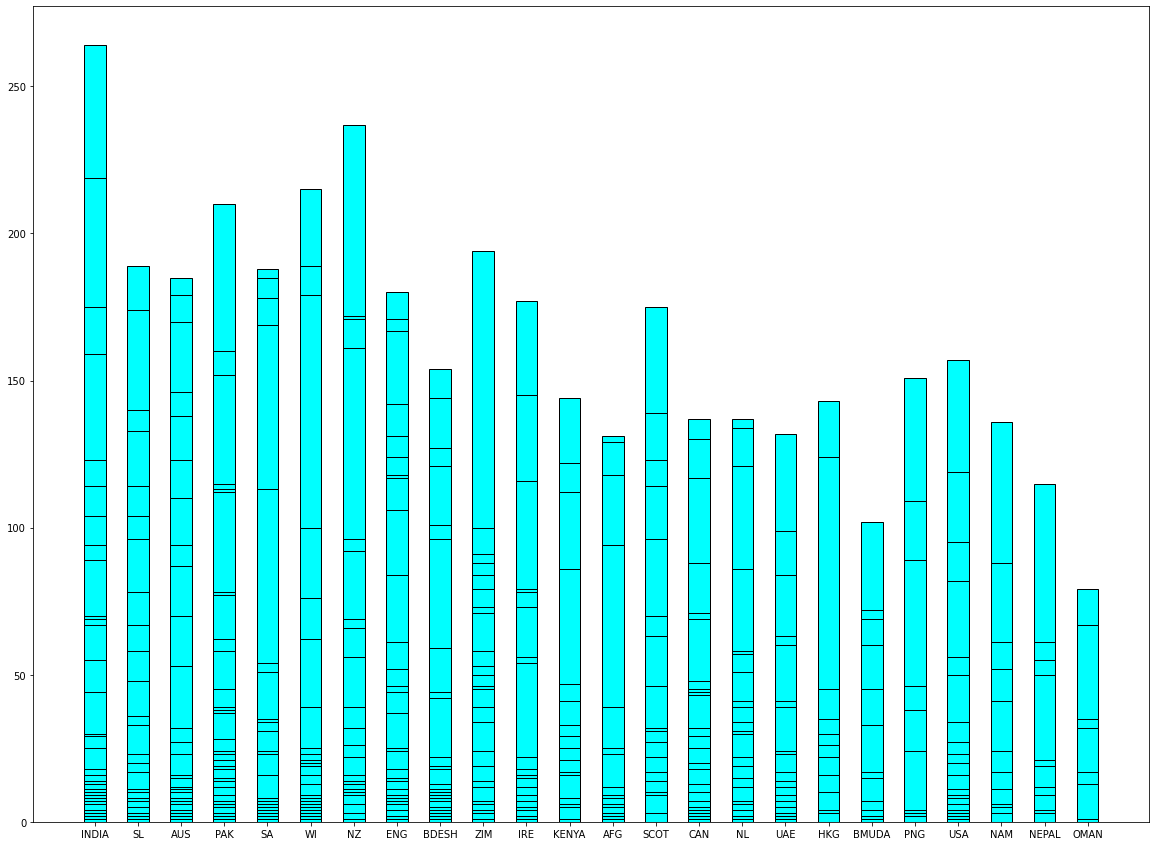

In [33]:
#plotting

plt.figure(figsize=(20,15))
# plt.bar(odi['Final Region'], odi['HS'], color='red')
plt.bar(odi['Final Region'], odi['HS'], color='cyan', width=0.5, edgecolor='black')

<Figure size 1440x360 with 0 Axes>

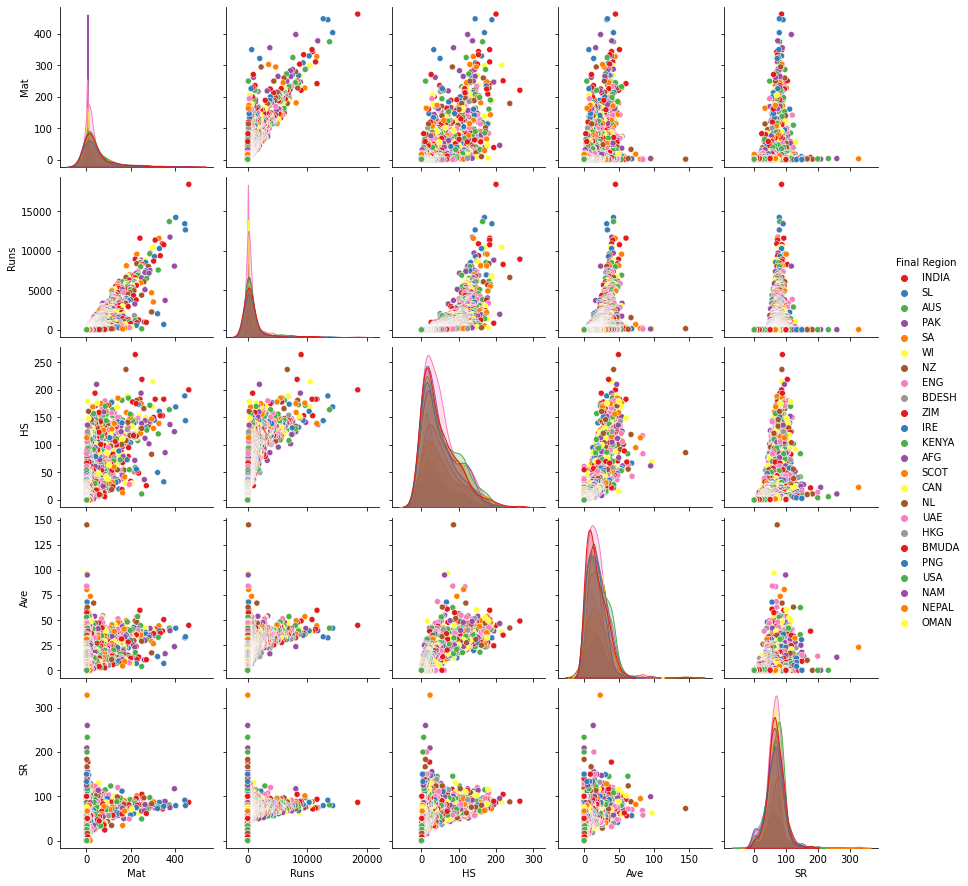

In [34]:
plt.figure(figsize=(20,5))
sns.pairplot(odi, hue='Final Region', palette='Set1')

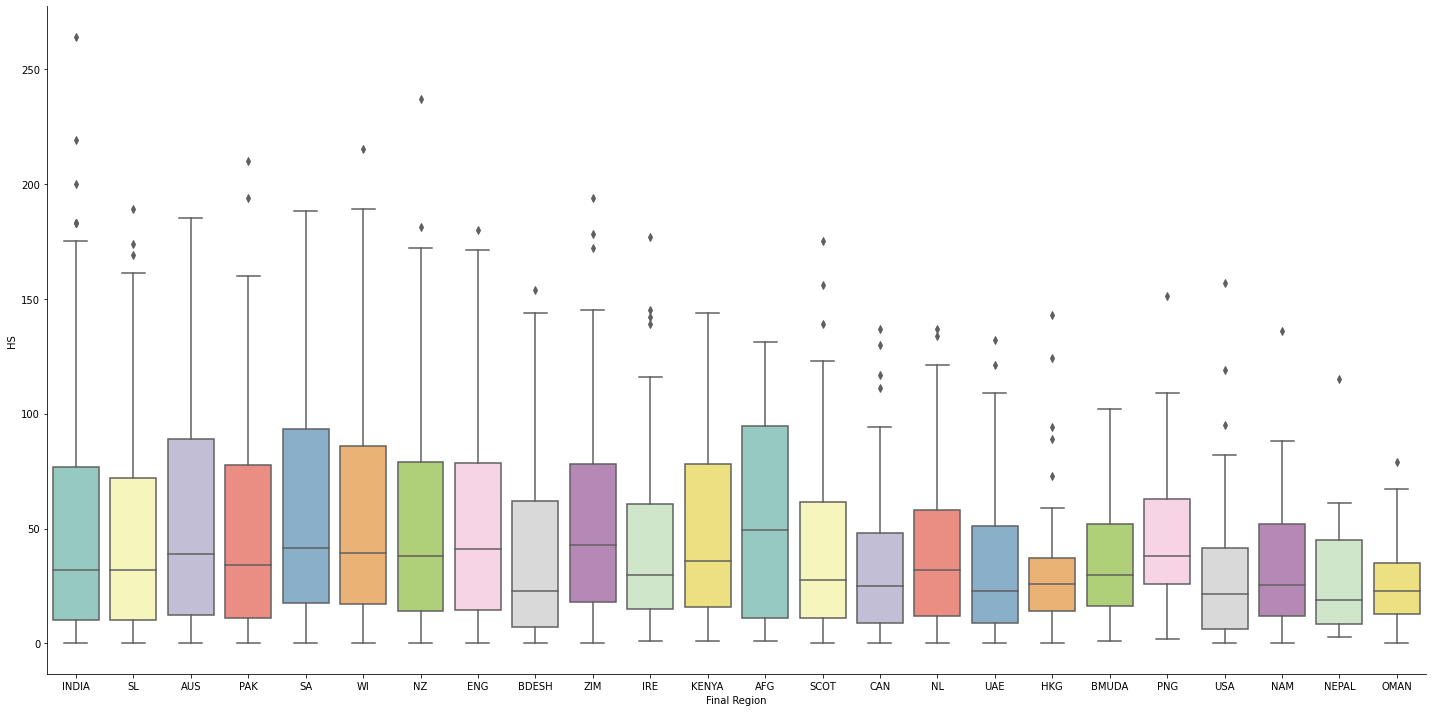

In [35]:
sns.catplot(x='Final Region', y='HS', data=odi, kind='box', palette='Set3', height=10, aspect=2)

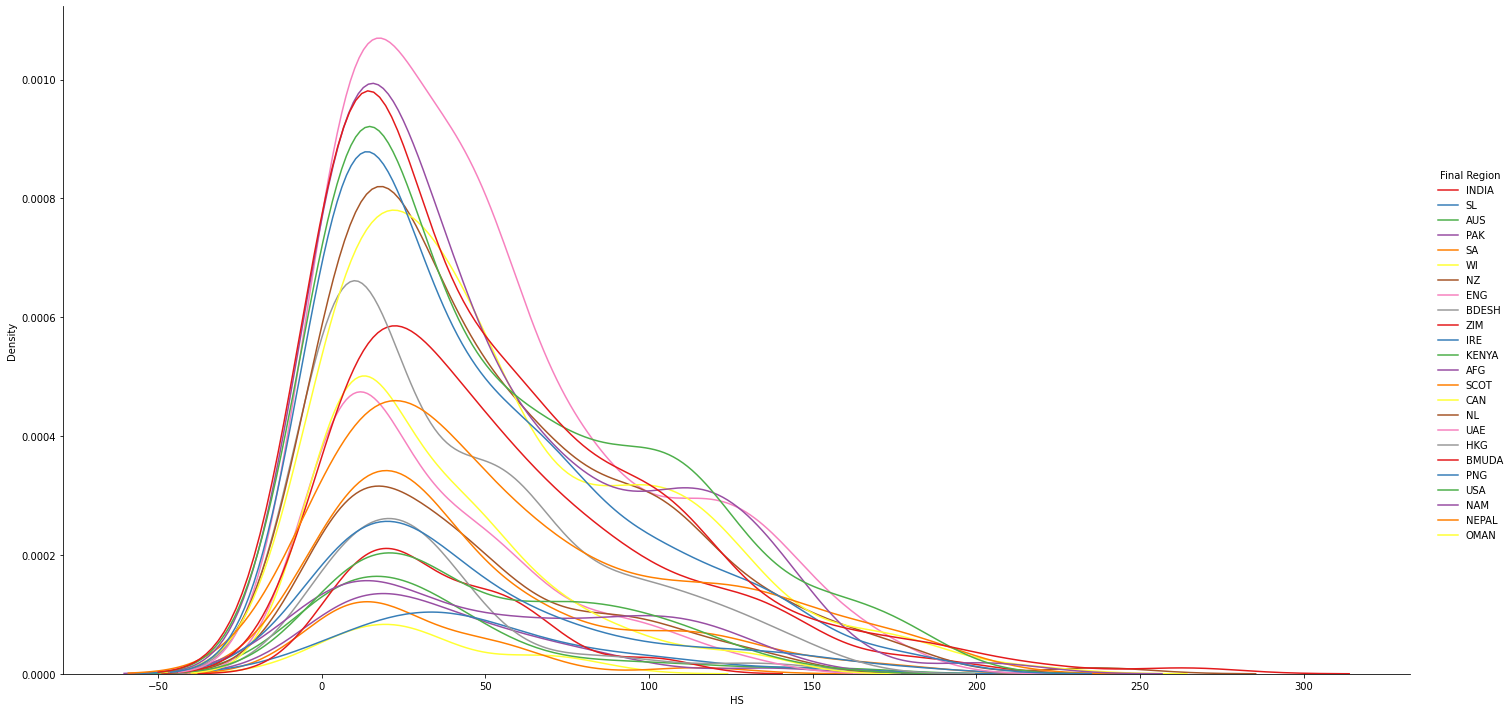

In [36]:
sns.displot(odi, x='HS', hue='Final Region', kind='kde', palette='Set1', height=10, aspect=2)

In [37]:
import plotly.express as px
px.scatter(odi, x="HS", y="Player", animation_frame="End", animation_group="Final Region",
           size="Runs", color="Final Region", hover_name="Final Region",
           log_x=False, size_max=200, range_x=[10,250], range_y=[0,90], height=1000)

In [38]:
import plotly.express as px
px.scatter(odi, x="HS", y="Player", animation_frame="Start", animation_group="Final Region",
           size="Runs", color="Final Region", hover_name="Final Region",
           log_x=False, size_max=200, range_x=[10,250], range_y=[0,90], height=1000)

In [39]:
from pandas_profiling import ProfileReport
report = ProfileReport(odi, title = 'Pandas Profiling Report', explorative=True)
report

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]